In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные вылаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых rлиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [64]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [65]:
numeric_columns = data.loc[:,data.dtypes!=np.object].columns
numeric_columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [66]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


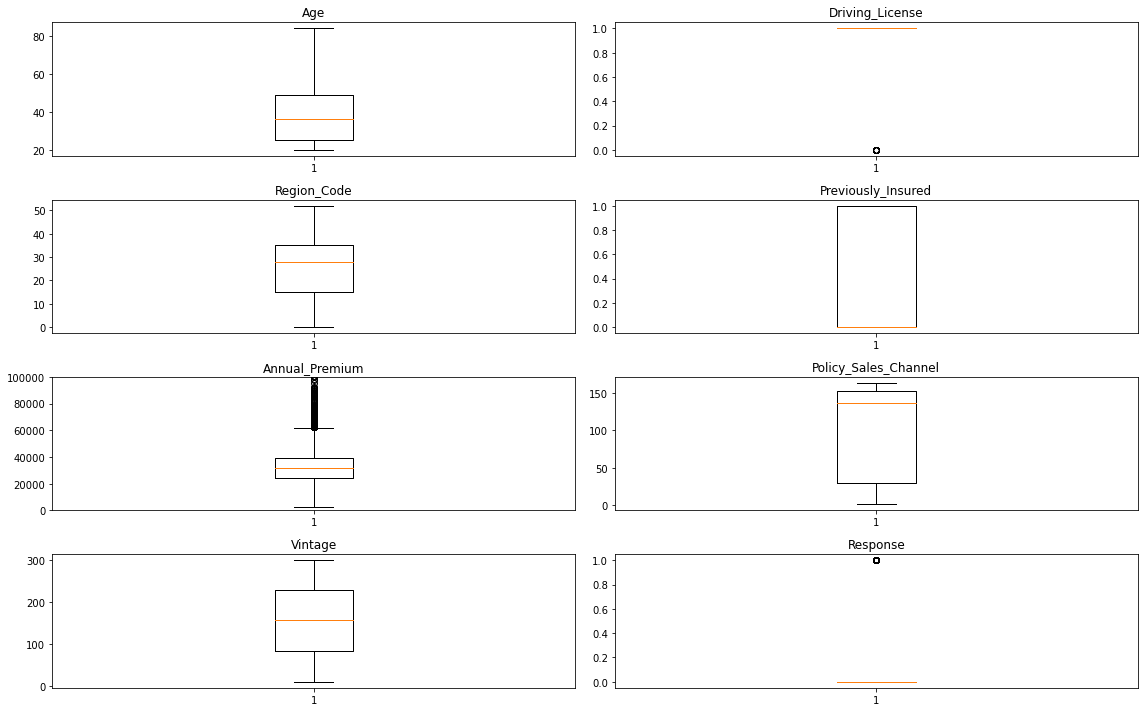

In [67]:
fig = plt.figure()

fig.set_size_inches(16, 10)


for i in range(len(numeric_columns)):
    ax_1 = fig.add_subplot(4, 2, i+1)
    col = numeric_columns[i]
    ax_1.set(title = col)    
    plt.boxplot(data[col].values)
    if col == 'Annual_Premium':
        plt.ylim((0, 100000))
    
fig.tight_layout()
    
plt.show()

In [68]:
categorical_columns = data.loc[:,data.dtypes==np.object].columns
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [69]:
data.describe(include="object")

,Gender,Vehicle_Age,Vehicle_Damage
count,10000,10000,10000
unique,2,3,2
top,Male,1-2 Year,Yes
freq,5437,5263,5143


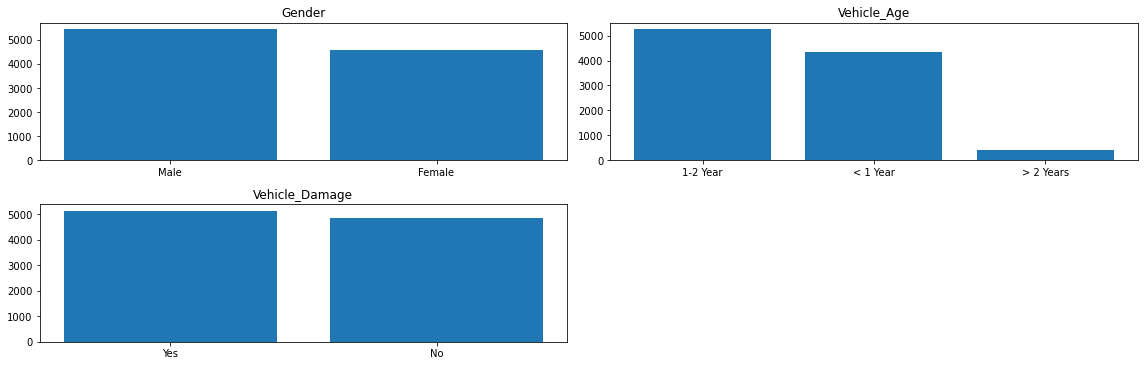

In [70]:
fig = plt.figure()

fig.set_size_inches(16, 10)


for i in range(len(categorical_columns)):
    ax_1 = fig.add_subplot(4, 2, i+1)
    col = categorical_columns[i]
    ax_1.set(title = col)    
    ax_1.bar(data[col].value_counts().index,data[col].value_counts().values)
    
fig.tight_layout()
    
plt.show()

In [71]:
data[numeric_columns].corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.081323,0.030638,-0.261456,0.081564,-0.576066,0.000030,0.113888
Driving_License,-0.081323,1.000000,0.004926,0.020464,-0.014338,0.044335,0.002704,0.011263
Region_Code,0.030638,0.004926,1.000000,-0.021270,-0.012213,-0.039733,-0.008527,0.010230
Previously_Insured,-0.261456,0.020464,-0.021270,1.000000,-0.005164,0.224719,0.022350,-0.333502
Annual_Premium,0.081564,-0.014338,-0.012213,-0.005164,1.000000,-0.123851,-0.008878,0.029839
Policy_Sales_Channel,-0.576066,0.044335,-0.039733,0.224719,-0.123851,1.000000,-0.006131,-0.146421
Vintage,0.000030,0.002704,-0.008527,0.022350,-0.008878,-0.006131,1.000000,-0.007187
Response,0.113888,0.011263,0.010230,-0.333502,0.029839,-0.146421,-0.007187,1.000000


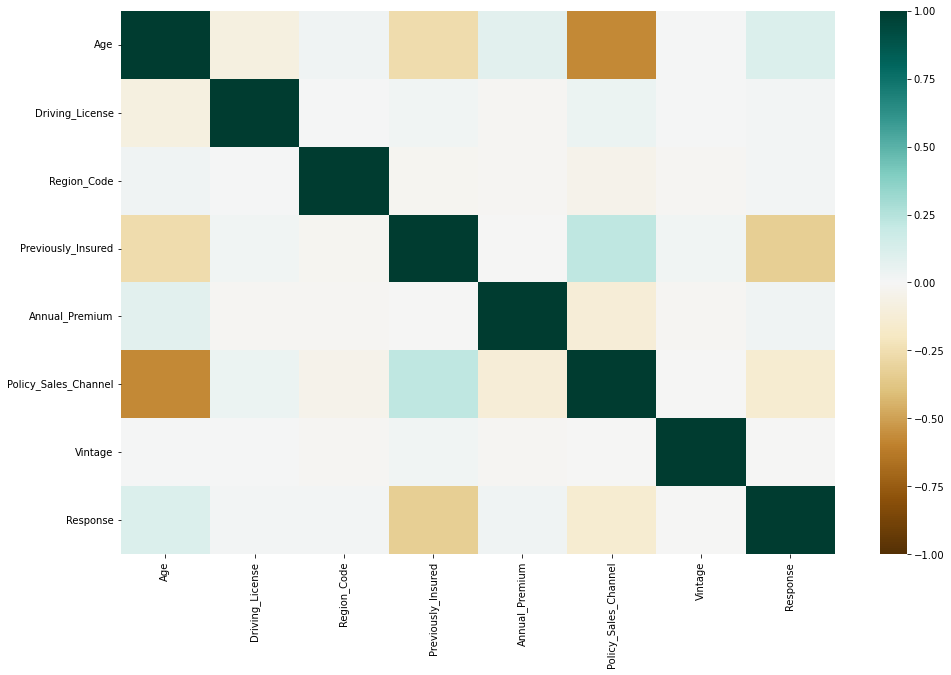

In [72]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(data[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()




In [73]:
data['Response'].value_counts()

0    8753
1    1247
Name: Response, dtype: int64

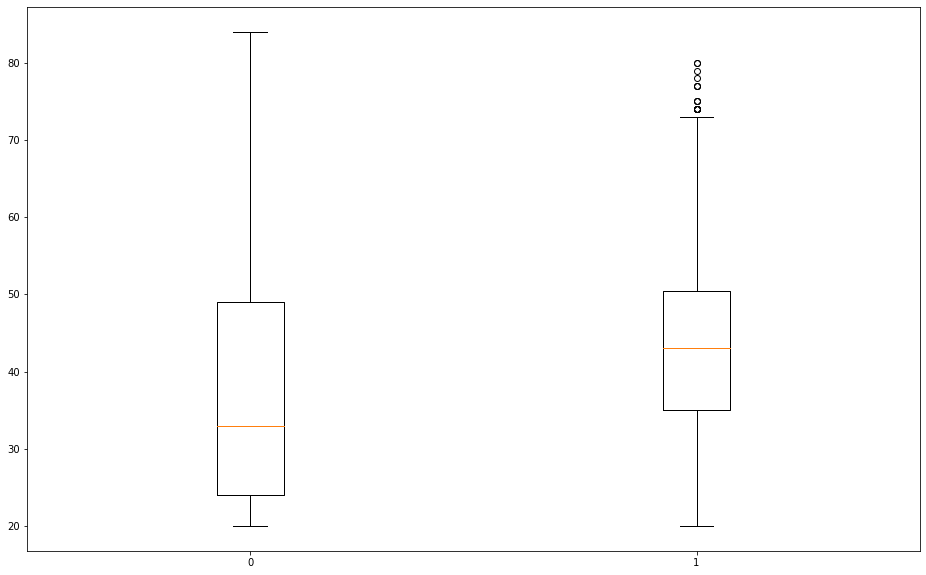

In [74]:
boxplot_data = []

for v in np.sort(data['Response'].unique()):
    boxplot_data.append((v, data[data['Response']==v]['Age']))
    
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot([v for  k,v in boxplot_data],
            labels=[k for  k,v in boxplot_data])

# plt.ylim((3, 10))

plt.show()

In [75]:
for col in categorical_columns:
    one_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)     
    data = pd.concat((data.drop(col, axis=1), one_hot), axis=1)

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, RocCurveDisplay

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=1,
                                   random_state=1,
                                   n_estimators=100)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=1)

In [26]:
print(model.score(X_test, y_test))

0.8515


In [27]:
print(f1_score(y_test, model.predict(X_test)))

0.27027027027027023


0.828168754605748


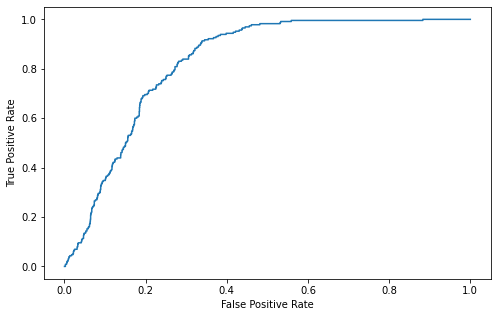

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

print(auc(fpr, tpr))

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [31]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [32]:
f1_score_matrix = {}
feature_importances_matrix = {}

for r in learning_rate_list:
    f1_score_matrix[r] = []
    feature_importances_matrix[r] = []
    for e in n_estimators_list:
        model = GradientBoostingClassifier(learning_rate=r,
                                   random_state=1,
                                   n_estimators=e)

        model.fit(X_train, y_train)
        
        f1_score_matrix[r].append(f1_score(y_test, model.predict(X_test), average='weighted'))
        feature_importances_matrix[r].append(model.feature_importances_)

In [33]:
f1_score_df  = pd.DataFrame(f1_score_matrix, index=n_estimators_list)

In [34]:
f1_score_df

,1.00,0.10,0.01
5,0.831627,0.830759,0.831008
10,0.838842,0.830759,0.831008
20,0.841775,0.830759,0.831008
50,0.841602,0.830759,0.831008
100,0.842926,0.831971,0.830759
200,0.840530,0.835457,0.830759
700,0.842988,0.845544,0.830510
1000,0.841267,0.844815,0.831464


In [37]:
feature_importances_matrix[0.1][6]

array([0.17121637, 0.00078541, 0.04151261, 0.05411706, 0.19701428,
       0.08134032, 0.09653876, 0.00675076, 0.01546148, 0.01807761,
       0.31718534])

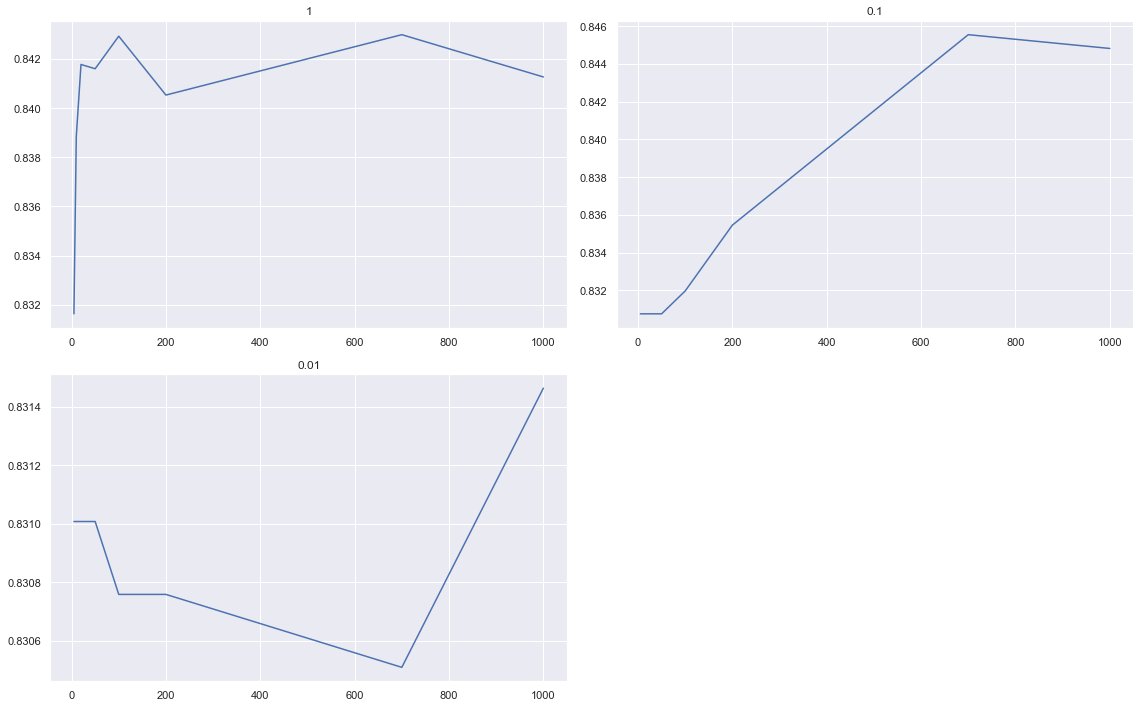

In [135]:
fig = plt.figure()

fig.set_size_inches(16, 10)


for i in range(len(learning_rate_list)):
    ax_1 = fig.add_subplot(2, 2, i+1)
    col = learning_rate_list[i]
    ax_1.set(title = col)    
    plt.plot(f1_score_df.index, f1_score_df[col])
    
fig.tight_layout()
    
plt.show()
    

<AxesSubplot:>

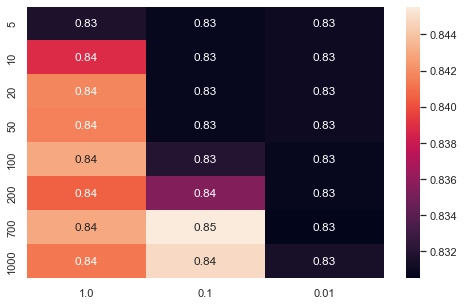

In [134]:
sns.heatmap(f1_score_df, annot=True)

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [136]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here

In [139]:
f1_scores_train = []
f1_scores_test = []
for e in n_estimators_list:
    model = GradientBoostingClassifier(random_state=1,
                                       max_depth=5,
                               n_estimators=e)

    model.fit(X_train, y_train)
    
    f1_scores_train.append(f1_score(y_train, model.predict(X_train), average='weighted'))
    f1_scores_test.append(f1_score(y_test, model.predict(X_test), average='weighted'))

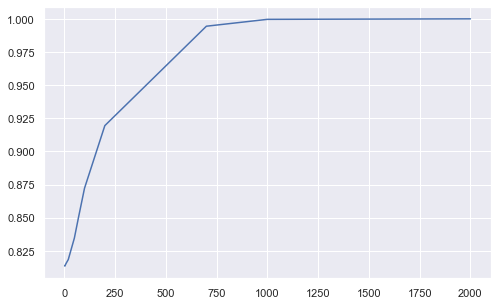

In [140]:
plt.plot(n_estimators_list, f1_scores_train)

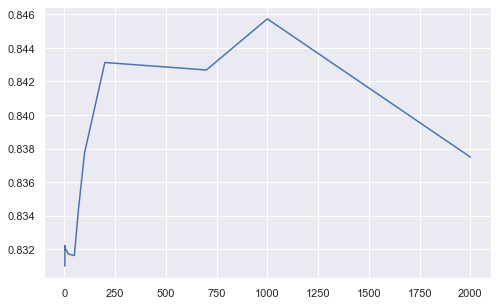

In [141]:
plt.plot(n_estimators_list, f1_scores_test)

In [142]:
f1_scores_train = []
f1_scores_test = []
for e in n_estimators_list:
    model = GradientBoostingClassifier(random_state=1,
                                       max_depth=5000,
                               n_estimators=e)

    model.fit(X_train, y_train)
    
    f1_scores_train.append(f1_score(y_train, model.predict(X_train), average='weighted'))
    f1_scores_test.append(f1_score(y_test, model.predict(X_test), average='weighted'))

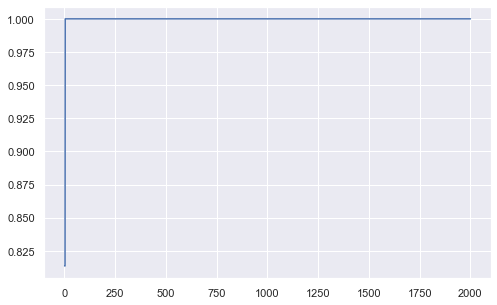

In [143]:
plt.plot(n_estimators_list, f1_scores_train)

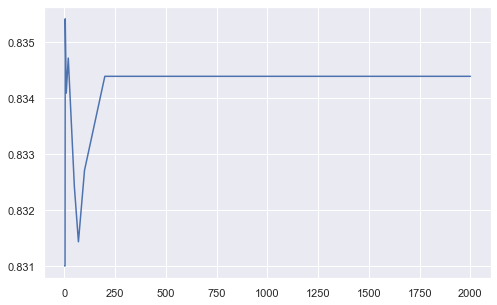

In [144]:
plt.plot(n_estimators_list, f1_scores_test)

In [145]:
f1_scores_train = []
f1_scores_test = []
for e in n_estimators_list:
    model = RandomForestClassifier(random_state=1,
                                       max_depth=5,
                               n_estimators=e)

    model.fit(X_train, y_train)
    
    f1_scores_train.append(f1_score(y_train, model.predict(X_train), average='weighted'))
    f1_scores_test.append(f1_score(y_test, model.predict(X_test), average='weighted'))

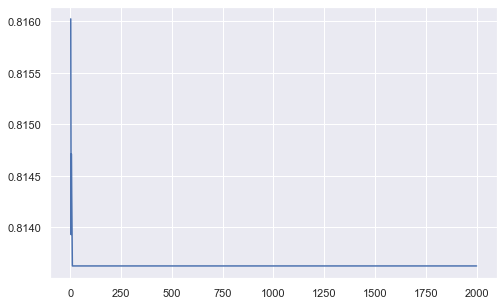

In [146]:
plt.plot(n_estimators_list, f1_scores_train)

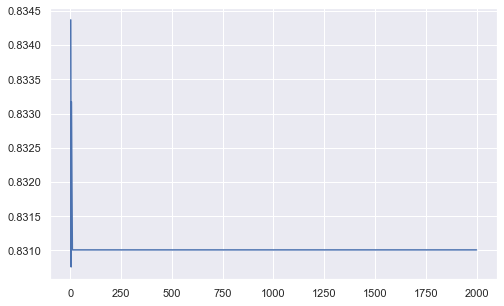

In [147]:
plt.plot(n_estimators_list, f1_scores_test)

In [148]:
f1_scores_train = []
f1_scores_test = []
for e in n_estimators_list:
    model = RandomForestClassifier(random_state=1,
                                       max_depth=5000,
                               n_estimators=e)

    model.fit(X_train, y_train)
    
    f1_scores_train.append(f1_score(y_train, model.predict(X_train), average='weighted'))
    f1_scores_test.append(f1_score(y_test, model.predict(X_test), average='weighted'))

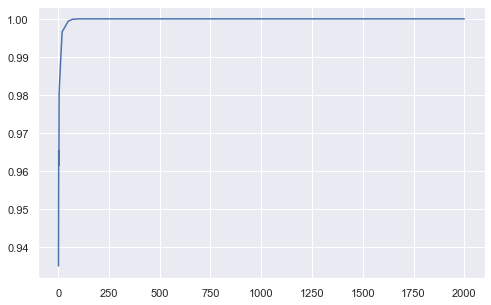

In [149]:
plt.plot(n_estimators_list, f1_scores_train)

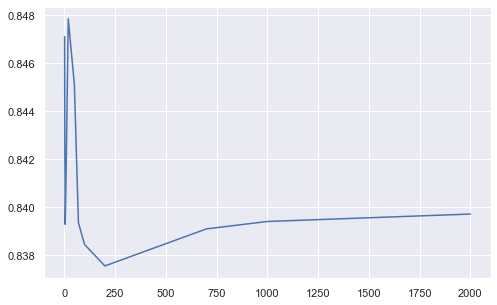

In [150]:
plt.plot(n_estimators_list, f1_scores_test)

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [82]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('vehicle_insurance.csv')

categorical_columns = data.loc[:,data.dtypes==np.object].columns # ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

catboost = CatBoostClassifier()

catboost.fit(X_train, y_train, cat_features=categorical_columns.values)

Learning rate set to 0.025035
0:	learn: 0.6524209	total: 37.3ms	remaining: 37.2s
1:	learn: 0.6213114	total: 58.4ms	remaining: 29.1s
2:	learn: 0.5922961	total: 80.4ms	remaining: 26.7s
3:	learn: 0.5658834	total: 104ms	remaining: 25.8s
4:	learn: 0.5423457	total: 126ms	remaining: 25s
5:	learn: 0.5180857	total: 175ms	remaining: 28.9s
6:	learn: 0.4986798	total: 205ms	remaining: 29s
7:	learn: 0.4802832	total: 225ms	remaining: 27.9s
8:	learn: 0.4619128	total: 248ms	remaining: 27.3s
9:	learn: 0.4465202	total: 271ms	remaining: 26.8s
10:	learn: 0.4341692	total: 293ms	remaining: 26.3s
11:	learn: 0.4204912	total: 323ms	remaining: 26.6s
12:	learn: 0.4147382	total: 344ms	remaining: 26.1s
13:	learn: 0.4094293	total: 367ms	remaining: 25.8s
14:	learn: 0.3996664	total: 390ms	remaining: 25.6s
15:	learn: 0.3902804	total: 414ms	remaining: 25.4s
16:	learn: 0.3851970	total: 437ms	remaining: 25.3s
17:	learn: 0.3768978	total: 460ms	remaining: 25.1s
18:	learn: 0.3694314	total: 482ms	remaining: 24.9s
19:	learn: 0

164:	learn: 0.2656059	total: 3.63s	remaining: 18.4s
165:	learn: 0.2655845	total: 3.64s	remaining: 18.3s
166:	learn: 0.2654737	total: 3.67s	remaining: 18.3s
167:	learn: 0.2653867	total: 3.69s	remaining: 18.3s
168:	learn: 0.2653705	total: 3.71s	remaining: 18.2s
169:	learn: 0.2651567	total: 3.73s	remaining: 18.2s
170:	learn: 0.2650380	total: 3.75s	remaining: 18.2s
171:	learn: 0.2649261	total: 3.77s	remaining: 18.2s
172:	learn: 0.2647970	total: 3.8s	remaining: 18.2s
173:	learn: 0.2646680	total: 3.83s	remaining: 18.2s
174:	learn: 0.2645217	total: 3.86s	remaining: 18.2s
175:	learn: 0.2643907	total: 3.88s	remaining: 18.2s
176:	learn: 0.2643332	total: 3.9s	remaining: 18.2s
177:	learn: 0.2642500	total: 3.92s	remaining: 18.1s
178:	learn: 0.2641025	total: 3.95s	remaining: 18.1s
179:	learn: 0.2639986	total: 3.97s	remaining: 18.1s
180:	learn: 0.2638472	total: 3.99s	remaining: 18.1s
181:	learn: 0.2638400	total: 4s	remaining: 18s
182:	learn: 0.2637431	total: 4.03s	remaining: 18s
183:	learn: 0.2636109

329:	learn: 0.2526588	total: 7.51s	remaining: 15.2s
330:	learn: 0.2525618	total: 7.53s	remaining: 15.2s
331:	learn: 0.2524847	total: 7.56s	remaining: 15.2s
332:	learn: 0.2524149	total: 7.59s	remaining: 15.2s
333:	learn: 0.2523243	total: 7.61s	remaining: 15.2s
334:	learn: 0.2522025	total: 7.67s	remaining: 15.2s
335:	learn: 0.2521330	total: 7.7s	remaining: 15.2s
336:	learn: 0.2519916	total: 7.72s	remaining: 15.2s
337:	learn: 0.2518927	total: 7.75s	remaining: 15.2s
338:	learn: 0.2518087	total: 7.78s	remaining: 15.2s
339:	learn: 0.2518041	total: 7.8s	remaining: 15.1s
340:	learn: 0.2517014	total: 7.82s	remaining: 15.1s
341:	learn: 0.2516274	total: 7.84s	remaining: 15.1s
342:	learn: 0.2515457	total: 7.88s	remaining: 15.1s
343:	learn: 0.2514780	total: 7.91s	remaining: 15.1s
344:	learn: 0.2514469	total: 7.93s	remaining: 15.1s
345:	learn: 0.2513844	total: 7.95s	remaining: 15s
346:	learn: 0.2513793	total: 7.96s	remaining: 15s
347:	learn: 0.2512813	total: 7.99s	remaining: 15s
348:	learn: 0.251239

491:	learn: 0.2392248	total: 11.6s	remaining: 12s
492:	learn: 0.2391350	total: 11.7s	remaining: 12s
493:	learn: 0.2390066	total: 11.7s	remaining: 12s
494:	learn: 0.2389140	total: 11.7s	remaining: 12s
495:	learn: 0.2388413	total: 11.7s	remaining: 11.9s
496:	learn: 0.2387519	total: 11.8s	remaining: 11.9s
497:	learn: 0.2386627	total: 11.8s	remaining: 11.9s
498:	learn: 0.2385946	total: 11.8s	remaining: 11.9s
499:	learn: 0.2385547	total: 11.8s	remaining: 11.8s
500:	learn: 0.2384713	total: 11.9s	remaining: 11.8s
501:	learn: 0.2383919	total: 11.9s	remaining: 11.8s
502:	learn: 0.2383035	total: 11.9s	remaining: 11.8s
503:	learn: 0.2382785	total: 11.9s	remaining: 11.7s
504:	learn: 0.2382106	total: 12s	remaining: 11.7s
505:	learn: 0.2381064	total: 12s	remaining: 11.7s
506:	learn: 0.2380365	total: 12s	remaining: 11.7s
507:	learn: 0.2379603	total: 12s	remaining: 11.7s
508:	learn: 0.2378898	total: 12.1s	remaining: 11.6s
509:	learn: 0.2377664	total: 12.1s	remaining: 11.6s
510:	learn: 0.2376984	total:

650:	learn: 0.2269012	total: 15.7s	remaining: 8.42s
651:	learn: 0.2268170	total: 15.7s	remaining: 8.4s
652:	learn: 0.2267351	total: 15.8s	remaining: 8.37s
653:	learn: 0.2267271	total: 15.8s	remaining: 8.35s
654:	learn: 0.2266115	total: 15.8s	remaining: 8.32s
655:	learn: 0.2265453	total: 15.8s	remaining: 8.3s
656:	learn: 0.2265124	total: 15.8s	remaining: 8.27s
657:	learn: 0.2264192	total: 15.9s	remaining: 8.25s
658:	learn: 0.2263150	total: 15.9s	remaining: 8.22s
659:	learn: 0.2262898	total: 15.9s	remaining: 8.2s
660:	learn: 0.2262122	total: 15.9s	remaining: 8.17s
661:	learn: 0.2260908	total: 16s	remaining: 8.15s
662:	learn: 0.2260229	total: 16s	remaining: 8.12s
663:	learn: 0.2259056	total: 16s	remaining: 8.1s
664:	learn: 0.2258246	total: 16s	remaining: 8.07s
665:	learn: 0.2257897	total: 16.1s	remaining: 8.05s
666:	learn: 0.2257470	total: 16.1s	remaining: 8.03s
667:	learn: 0.2256600	total: 16.1s	remaining: 8s
668:	learn: 0.2256540	total: 16.1s	remaining: 7.98s
669:	learn: 0.2255662	total

813:	learn: 0.2156565	total: 19.8s	remaining: 4.53s
814:	learn: 0.2156470	total: 19.8s	remaining: 4.5s
815:	learn: 0.2155211	total: 19.9s	remaining: 4.48s
816:	learn: 0.2154771	total: 19.9s	remaining: 4.46s
817:	learn: 0.2153995	total: 19.9s	remaining: 4.43s
818:	learn: 0.2153983	total: 20s	remaining: 4.41s
819:	learn: 0.2153363	total: 20s	remaining: 4.39s
820:	learn: 0.2152561	total: 20s	remaining: 4.36s
821:	learn: 0.2152017	total: 20s	remaining: 4.34s
822:	learn: 0.2151259	total: 20.1s	remaining: 4.31s
823:	learn: 0.2150523	total: 20.1s	remaining: 4.29s
824:	learn: 0.2150484	total: 20.1s	remaining: 4.26s
825:	learn: 0.2149668	total: 20.1s	remaining: 4.24s
826:	learn: 0.2149114	total: 20.2s	remaining: 4.22s
827:	learn: 0.2149024	total: 20.2s	remaining: 4.19s
828:	learn: 0.2148305	total: 20.2s	remaining: 4.17s
829:	learn: 0.2148292	total: 20.2s	remaining: 4.14s
830:	learn: 0.2147558	total: 20.3s	remaining: 4.12s
831:	learn: 0.2147078	total: 20.3s	remaining: 4.1s
832:	learn: 0.2146436	

980:	learn: 0.2053281	total: 24s	remaining: 464ms
981:	learn: 0.2052700	total: 24s	remaining: 440ms
982:	learn: 0.2052351	total: 24s	remaining: 415ms
983:	learn: 0.2051874	total: 24s	remaining: 391ms
984:	learn: 0.2051474	total: 24.1s	remaining: 367ms
985:	learn: 0.2051202	total: 24.1s	remaining: 342ms
986:	learn: 0.2050592	total: 24.1s	remaining: 318ms
987:	learn: 0.2049880	total: 24.1s	remaining: 293ms
988:	learn: 0.2049270	total: 24.2s	remaining: 269ms
989:	learn: 0.2048316	total: 24.2s	remaining: 244ms
990:	learn: 0.2048041	total: 24.2s	remaining: 220ms
991:	learn: 0.2047685	total: 24.2s	remaining: 195ms
992:	learn: 0.2047026	total: 24.3s	remaining: 171ms
993:	learn: 0.2046458	total: 24.3s	remaining: 147ms
994:	learn: 0.2045579	total: 24.3s	remaining: 122ms
995:	learn: 0.2045122	total: 24.3s	remaining: 97.7ms
996:	learn: 0.2044152	total: 24.4s	remaining: 73.3ms
997:	learn: 0.2043508	total: 24.4s	remaining: 48.9ms
998:	learn: 0.2042925	total: 24.4s	remaining: 24.4ms
999:	learn: 0.20

In [83]:
print(classification_report(y_test, catboost.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.889     0.987     0.935      1770
           1      0.343     0.052     0.091       230

    accuracy                          0.879      2000
   macro avg      0.616     0.520     0.513      2000
weighted avg      0.826     0.879     0.838      2000



In [8]:
catboost.feature_importances_

array([ 3.1033428 , 11.36658464,  0.03227638,  7.43228013, 27.35891126,
        4.74671151, 21.36760853,  9.26128996,  6.2198574 ,  9.11113739])

In [38]:
feature_importances_matrix[0.1][6]

array([0.17121637, 0.00078541, 0.04151261, 0.05411706, 0.19701428,
       0.08134032, 0.09653876, 0.00675076, 0.01546148, 0.01807761,
       0.31718534])

In [42]:
X.columns.values

array(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'], dtype=object)

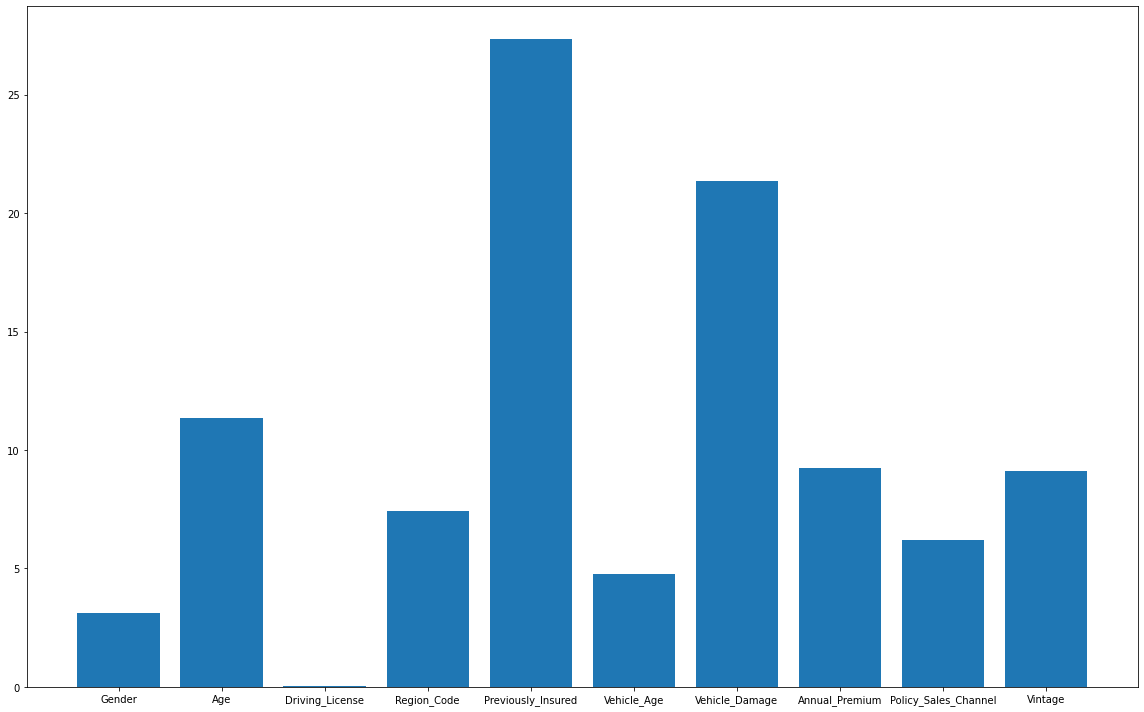

In [46]:
fig = plt.figure()

fig.set_size_inches(16, 10)

plt.bar(X.columns.values,catboost.feature_importances_)
    
fig.tight_layout()
    
plt.show()



**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

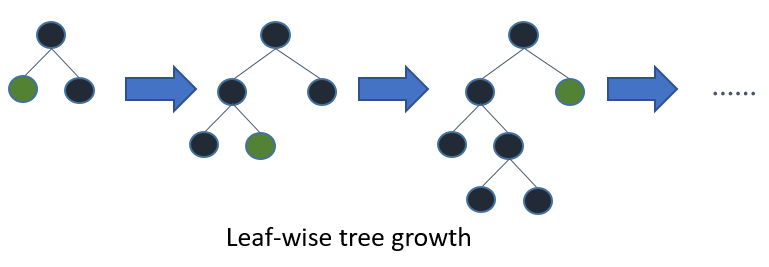

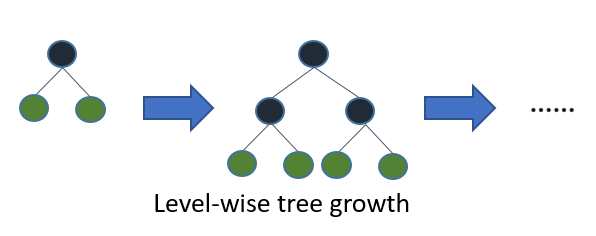

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [77]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

model = LGBMClassifier()

search = GridSearchCV(model, 
                      params, 
                      scoring='neg_mean_squared_error'
                      )

search.fit(X_train, y_train)


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='neg_mean_squared_error')

In [78]:
print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, y_test)}")

Best parameter (CV score=-0.12712):
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
Качество лучшей модели на финальном тесте: -0.115


In [79]:
from sklearn.metrics import precision_score

precision_score(y_test, search.predict(X_test))

0.0

In [81]:
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.885     1.000     0.939      1770
           1      0.000     0.000     0.000       230

    accuracy                          0.885      2000
   macro avg      0.443     0.500     0.469      2000
weighted avg      0.783     0.885     0.831      2000

